**ANÁLISIS DE LA PANDEMIA COVID-19**

Sin duda alguna la andemia del Covid 19 ha representado el reto más grande de la humanidad de los últimos años. A la fecha de realización de esta notebook se han reportado más de 6 millones de muertes con mas de 530 millones casos reportados a nivel mundial. El entendimiento de como esto se propaga es fundamental para preparnos como sociedad para enfreantar retos similares por venir; y es allí donde éstas herramientas de análisis y predicción cobran valor. Pronosticar los comportamientos de las curvas de contagio y la eficiencia de distintas medidas podrían resultar el salvar muchas vidas.\

El presente proyecto de Ciencia de Datos evaluará características de la pandemia, fundamentalmente enfocado en los siguientes puntos:
\
    **-Análisis Explorartorio de la Data\
    -Entender como inicia una curva\
    -Evaluar estrategias usadas en distintos países\
    -Elaborar modelos predictorios en base a las estrategias adoptadas\
    -Evaluar los modelos realizados en otros países de forma de comprobar su eficiencia**

# Exploratory Data Analysis

## Librerías

In [1]:
#Librerías Standard:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math

#Liberias Estadísticas:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

from scipy.optimize import curve_fit
from scipy.stats import norm

#Settings:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

#Estilo de colores para todos los gráficos
plt.style.use('ggplot')
#Para volver a default utilizar lo siguiente:
# plt.rcdefaults()

In [3]:
datos=pd.read_csv('owid-covid-data.csv')
datos.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
print(datos.shape)

(190184, 67)


In [5]:
var_num = []
var_cat = []

for i in datos.columns:
  if datos.dtypes[i] != "object":
    var_num.append(i)
  else :
    var_cat.append(i)

print(f"Variables de tipo categoricas: {var_cat}")
print(f"Variables de tipo numericas: {var_num}")

Variables de tipo categoricas: ['iso_code', 'continent', 'location', 'date', 'tests_units']
Variables de tipo numericas: ['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated

In [6]:
datos.isna().sum().sort_values(ascending=False).head(30)

weekly_icu_admissions_per_million          184037
weekly_icu_admissions                      184037
excess_mortality_cumulative_per_million    183659
excess_mortality                           183659
excess_mortality_cumulative                183659
excess_mortality_cumulative_absolute       183659
weekly_hosp_admissions_per_million         177917
weekly_hosp_admissions                     177917
total_boosters                             166153
total_boosters_per_hundred                 166153
icu_patients_per_million                   164897
icu_patients                               164897
hosp_patients_per_million                  163637
hosp_patients                              163637
new_vaccinations                           147635
people_fully_vaccinated                    143249
people_fully_vaccinated_per_hundred        143249
people_vaccinated_per_hundred              140709
people_vaccinated                          140709
total_vaccinations_per_hundred             138252


In [7]:
# La informacion acerca de que es exactamente cada variable podemos encontrarla en el siguiente link:
# https://github.com/owid/covid-19-data/tree/master/public/data#confirmed-cases

## Seleccion de paises

El criterio a la hora de seleccionar los paises a sido basicamente el de utilizar paises de diferentes continentes, culturas, y densidades poblacionales, con la intencion de poder generalizar mejor los datos.

In [8]:
paises=datos['location'] #cargo el vector de paises
confirmados=datos['total_cases'] #carga vector todos los casos confirmados

In [9]:
sel_paises = ["Germany","France","United Kingdom","Italy","Russia","Thailand","Brazil","Argentina","United States","Mexico"]

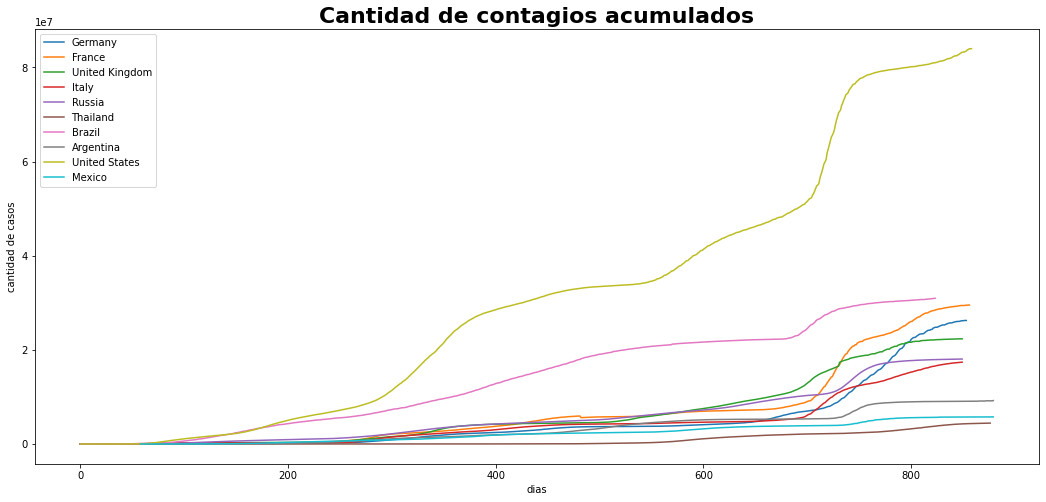

In [10]:
plt.figure(figsize=(18,8))
for i in sel_paises:

  lista = []
  ind = np.where(paises==i)
  ind = ind[0]
  casos = confirmados[ind]
  dias = np.arange(0,len(casos))
  plt.title("Cantidad de contagios acumulados", fontsize=22, fontweight ="bold")
  plt.plot(dias,casos, label=i)
  plt.xlabel('dias')
  plt.ylabel('cantidad de casos')
  plt.legend(loc=0)

In [11]:
# Luego de hacer un analisis de las ventanas de tiempo indicadas para cada pais, las incluimos en listas para una visualizacion más sencilla.

ven1 = [30,30,10,24,30,20,0,62,38,100]
ven2 = [55,90,70,50,100,80,60,122,70,160]
data_p = pd.DataFrame({"pais":sel_paises, "t0":ven1,"tf":ven2})
data_p

,pais,t0,tf
0,Germany,30,55
1,France,30,90
2,United Kingdom,10,70
3,Italy,24,50
4,Russia,30,100
5,Thailand,20,80
6,Brazil,0,60
7,Argentina,62,122
8,United States,38,70
9,Mexico,100,160


In [12]:
def info_pais (pais, t0, tf):

    ind=np.where(paises==pais)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))

    casos_principio=casos[t0:tf]
    dias_principio=dias[t0:tf]

    #ajustamos ---- scipy.optimize.curve_fit(f, xdata, ydata)
    popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

    k=popt[0]
    t0_=popt[1]
    casos_simu=exponencial(dias_principio,k,t0_)

    dic = {"Pais": pais , "t0":[t0], "t":[tf], "k": [k]}
    datos_pais = pd.DataFrame(data=dic)
    return datos_pais

In [13]:
def graf_pais (pais, t0, tf):

    ind=np.where(paises==pais)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))

    casos_principio=casos[t0:tf]
    dias_principio=dias[t0:tf]

    #ajustamos ---- scipy.optimize.curve_fit(f, xdata, ydata)
    popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

    k=popt[0]
    t0_=popt[1]
    casos_simu=exponencial(dias_principio,k,t0_)

    dic = {"Pais": pais , "t0":[t0], "t":[tf], "k": [k]}
    datos_pais = pd.DataFrame(data=dic)

    
    plt.figure(figsize=(20,5))
    plt.suptitle(pais, fontsize=22, fontweight="bold")
    

    plt.subplot(1,3,1)
    plt.plot(dias_principio,casos_principio)
    plt.title("Curva de contagio")
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')

    plt.subplot(1,3,2)
    plt.plot(dias_principio,np.log(casos_principio))
    plt.title("Logaritmo de la curva de contagio")
    plt.xlabel('dias')
    plt.ylabel('log cantidad de casos')

    plt.subplot(1,3,3)
    plt.title("Prediccion del modelo")
    plt.plot(dias_principio,casos_principio,'.')
    plt.plot(dias_principio,casos_simu)
    plt.xlabel('dias')
    plt.ylabel('cantidad de casos')
    
    plt.tight_layout()

In [14]:
# Workflow propuesto

# from IPython.display import Image
# Image("wf_paises_parte1.png")

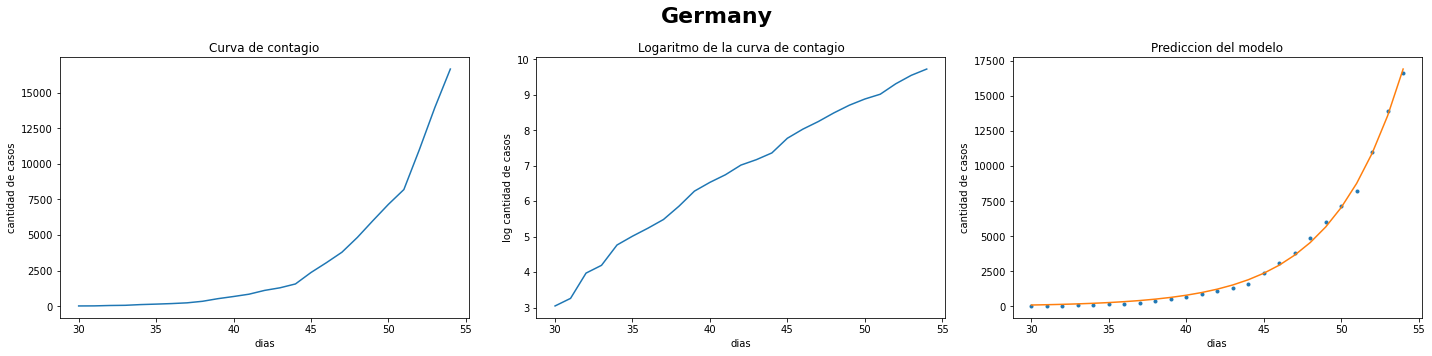

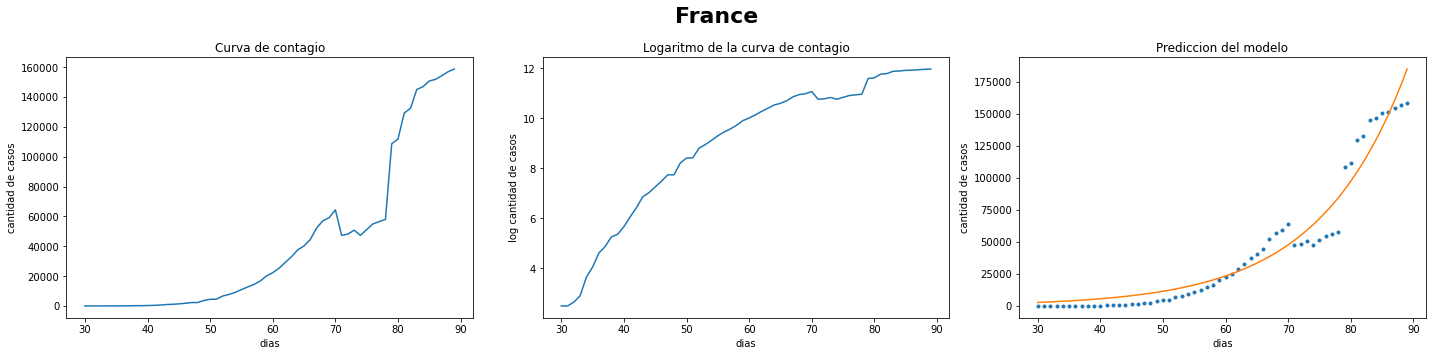

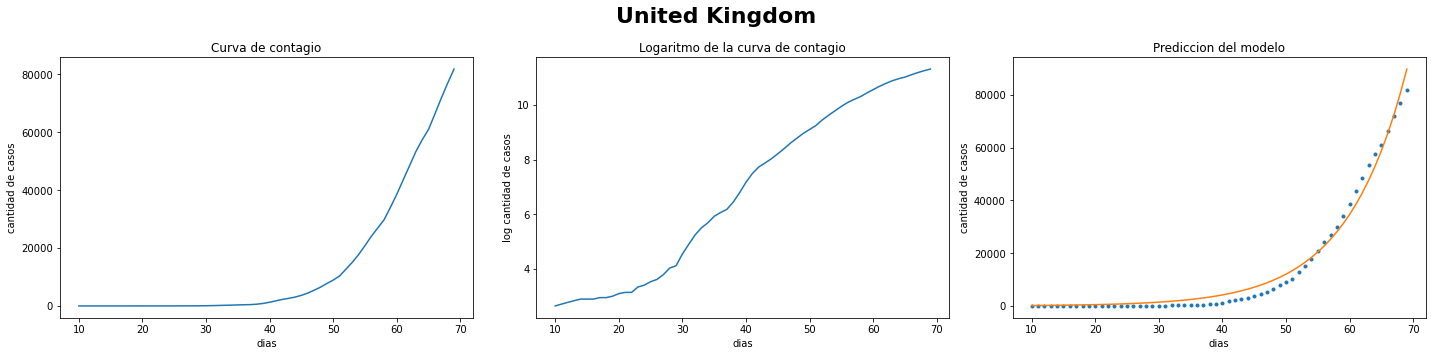

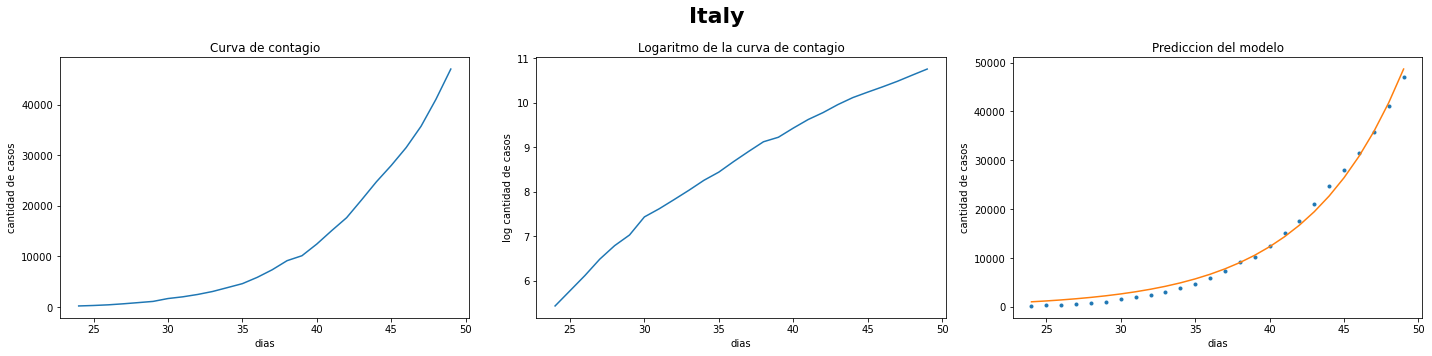

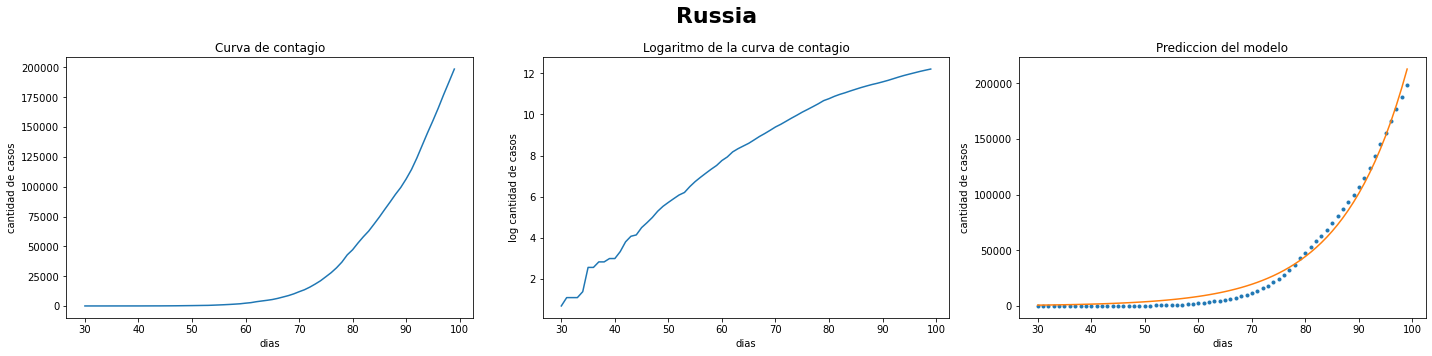

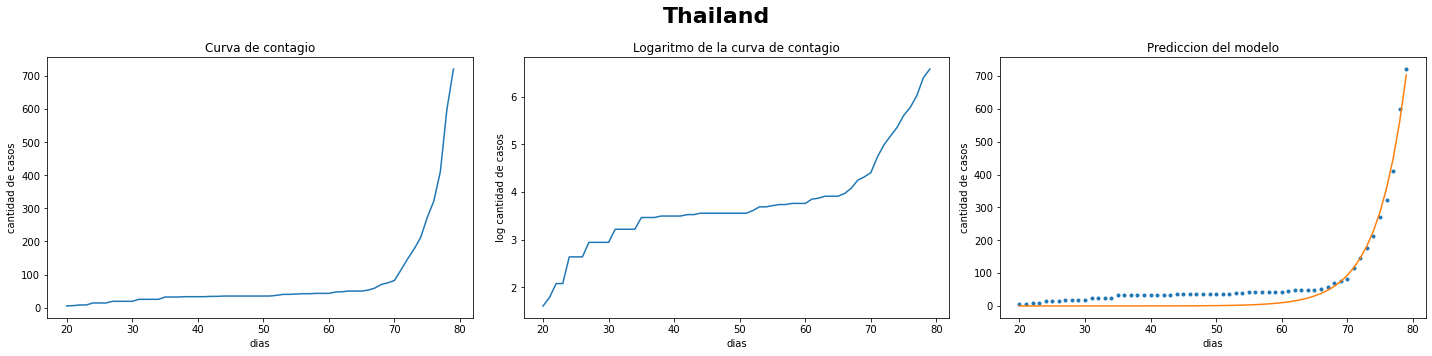

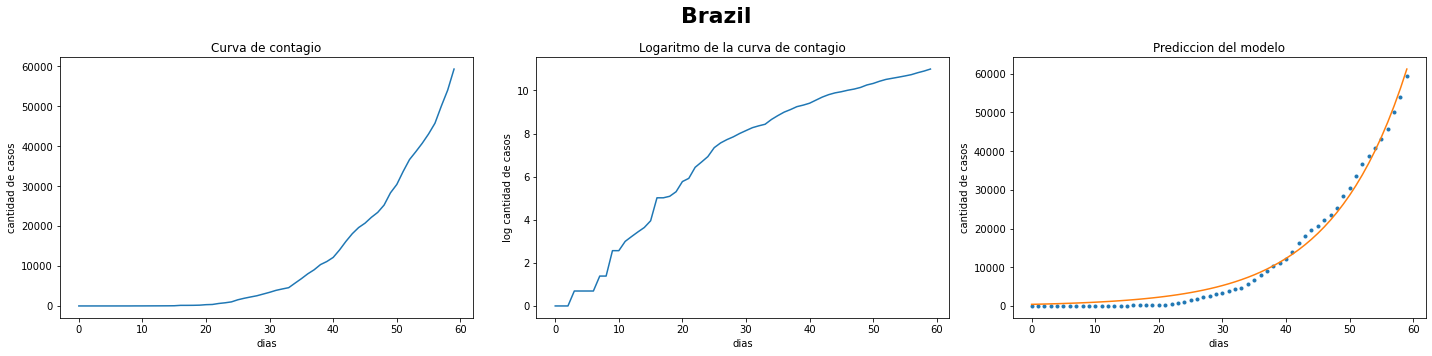

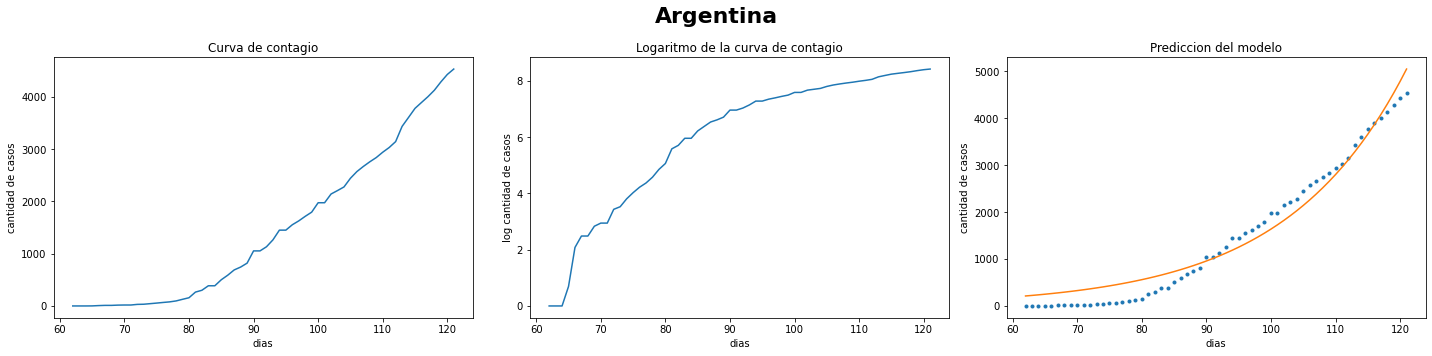

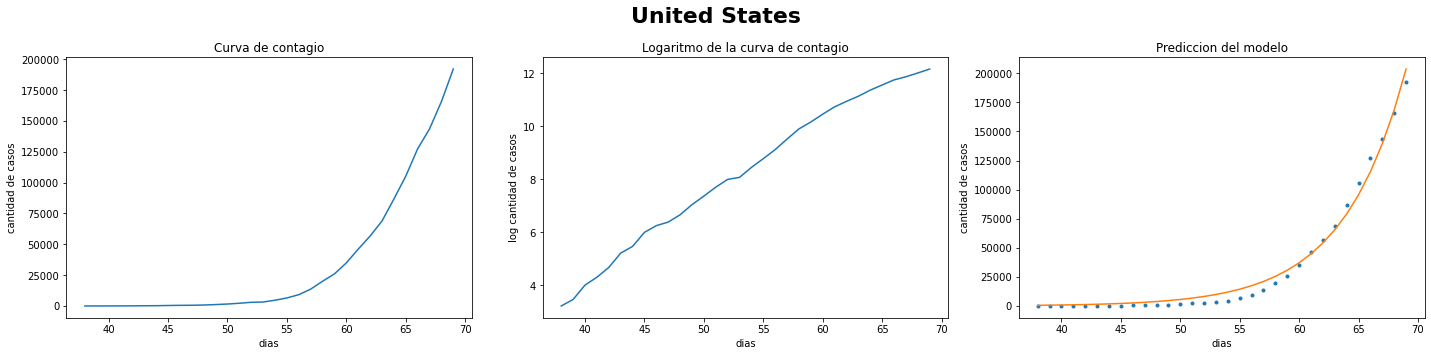

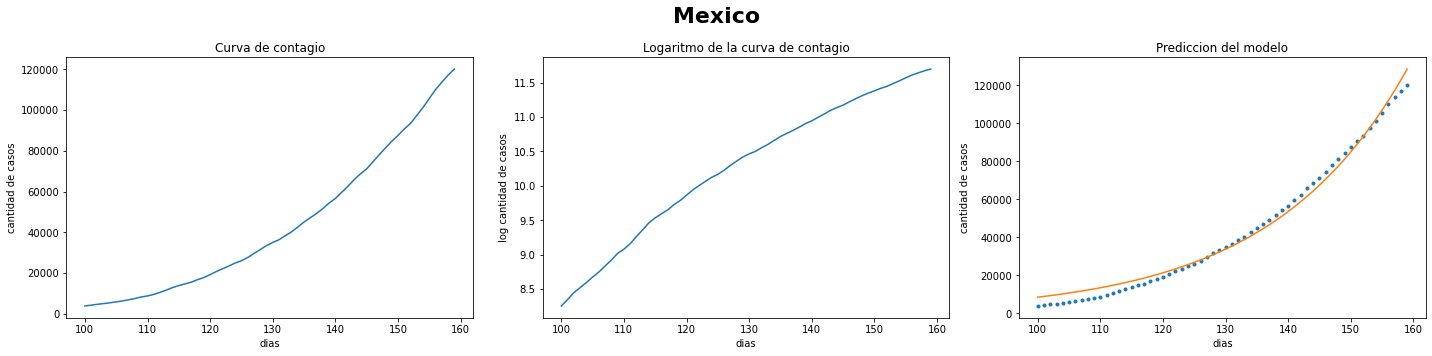

In [15]:
for i in range(len(data_p)):
    graf_pais(data_p.iloc[i].pais, data_p.iloc[i].t0, data_p.iloc[i].tf)

# Evaluando K

In [16]:
list = []

for i in range(len(data_p)):

    df = info_pais(data_p.iloc[i].pais, data_p.iloc[i].t0, data_p.iloc[i].tf)
    list.append(df)

df_f = pd.concat(list)
df_f

,Pais,t0,t,k
0,Germany,30,55,0.219179
0,France,30,90,0.071268
0,United Kingdom,10,70,0.105630
0,Italy,24,50,0.152408
0,Russia,30,100,0.082416
0,Thailand,20,80,0.224437
0,Brazil,0,60,0.084537
0,Argentina,62,122,0.053590
0,United States,38,70,0.189118
0,Mexico,100,160,0.046104


In [17]:
val_k = df_f.k
val_k

0    0.219179
0    0.071268
0    0.105630
0    0.152408
0    0.082416
0    0.224437
0    0.084537
0    0.053590
0    0.189118
0    0.046104
Name: k, dtype: float64

In [18]:
# Obtenemos valores estadisticos

print(f"Media de k: { val_k.mean() }")
print(f"Mediana de k: { val_k.median() }")
print(f"Desvio estandar de k: { val_k.std() }")

Media de k: 0.12286874783367867
Mediana de k: 0.09508349111738551
Desvio estandar de k: 0.06799599490573142


Text(0.5, 1.0, 'Distribucion de densidad de k')

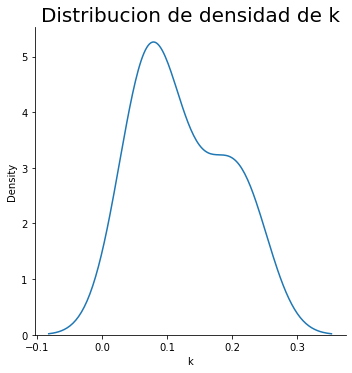

In [19]:
sns.displot(val_k, kind="kde")
plt.title("Distribucion de densidad de k", fontsize=20)

k_final=0.1228023306127017


Text(0, 0.5, 'Muestras')

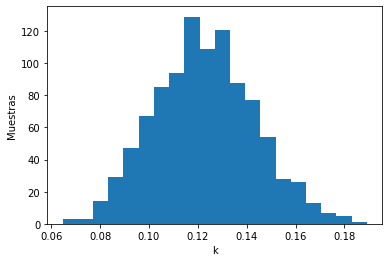

In [20]:
# Bootstrapping

datos_boots = bootstrap_simplificado(val_k,1000)
alpha = 1
medias = np.apply_along_axis(func1d=np.mean, axis=1, arr=datos_boots)
medias.sort()
k_final = medias.mean()
print(f"k_final={medias.mean()}")
plt.hist(medias, bins=20)
plt.xlabel("k")
plt.ylabel("Muestras")

In [21]:
# Construccion del intervalo de confianza
inferior = np.percentile(medias, alpha/2)
superior = np.percentile(medias, (100-alpha/2))
intervalo_confianza = [inferior, superior]
print(f"Con una certeza del 95% el valor del k promedio se encuentra en el intervalo: {intervalo_confianza}")

Con una certeza del 95% el valor del k promedio se encuentra en el intervalo: [0.07625628893225841, 0.17782106583208637]


## Mundial

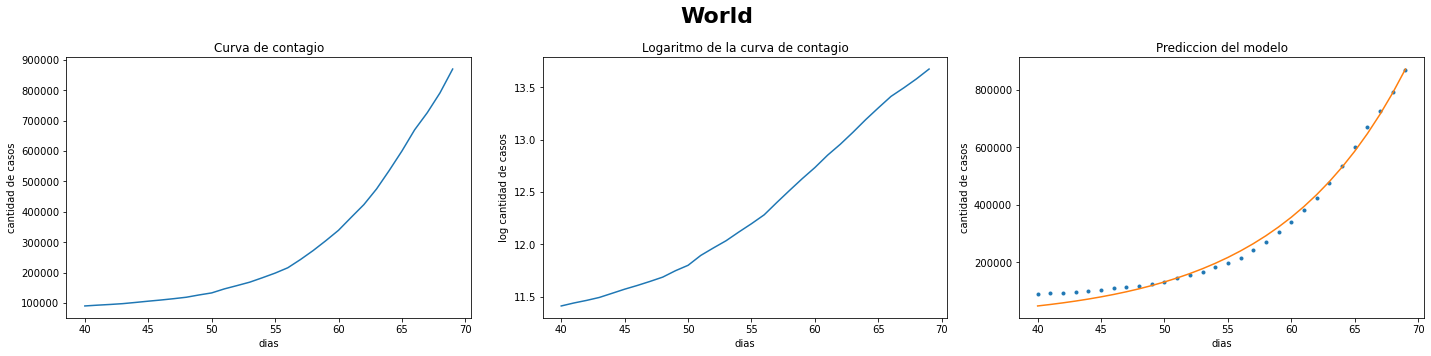

In [22]:
graf_pais("World", 40, 70)

In [23]:
info_pais("World", 40, 70)

,Pais,t0,t,k
0,World,40,70,0.099101


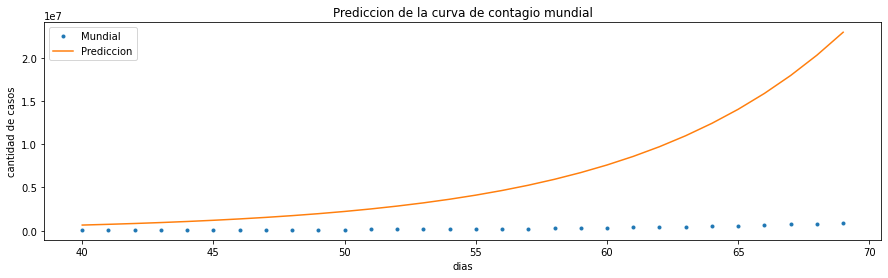

In [24]:
# Probamos el k promedio que habiamos calculado para predecir el comportamiento de la curva de contagio mundial.

ind_world=np.where(paises=='World')
ind_world=ind_world[0]
casos_world=confirmados[ind_world]
casos_principio=casos_world[40:70]
dias_principio=dias[40:70]
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)

k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)


casos_simu=exponencial(dias_principio,k_final,t0)

plt.figure(figsize=(15,4))
plt.plot(dias_principio,casos_principio,'.', label="Mundial")
plt.plot(dias_principio,casos_simu, label="Prediccion")
plt.title("Prediccion de la curva de contagio mundial")
plt.xlabel('dias') 
plt.ylabel('cantidad de casos')
plt.legend()

In [25]:
# RMSE
rmse = mean_squared_error(casos_principio, casos_simu)
print(np.format_float_scientific(rmse, precision = 1, exp_digits=3))

7.4e+013


## Conclusion

Vemos que el RMSE dio un resultado muy malo para el modelo que se propuso, pero de todas formas es lógico pensar que es improbable poder hacer un modelo con un "k" que se aproxime al "k mundial", y que sirva para predecir la cantidad de contagios. Primordialmente esto es por que si bien la infecciosidad del virus es la misma, las formas de propagarse van a variar mucho en los diferentes paises, como tambien las fechas en las que el virus comenzo a propagarse. Esto indica que para poder predecir con una precision considerable la cantidad de contagios hay que tener en cuenta la poblacion de paises bajo las mismas politicas publicas contra el virus. Estas medidas pueden ser uso de mascarilla, hacer cuarentena, vacunaciones, etc.

# Evaluando Estrategias

## Medida

La medida sanitaria elegida es la cuarentena.

In [26]:
data_cuarentena = pd.read_csv('stay-at-home-covid.csv')
data_cuarentena.Day = pd.to_datetime(data_cuarentena.Day)
data_cuarentena.stay_home_requirements.replace(1,0, inplace=True)
data_cuarentena.stay_home_requirements.replace([3,2],1, inplace=True)

In [27]:
data_cuarentena

,Entity,Code,Day,stay_home_requirements
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0
...,...,...,...,...
160717,Zimbabwe,ZWE,2022-05-20,1
160718,Zimbabwe,ZWE,2022-05-21,1
160719,Zimbabwe,ZWE,2022-05-22,1
160720,Zimbabwe,ZWE,2022-05-23,1


https://ourworldindata.org/covid-stay-home-restrictions

Paises que SI hicieron cuarentena:

    -Argentina
    -Mexico
    -China
    -India
    -Italia
    
Paises que NO hicieron cuarentena:

    -Suecia
    -Iran
    -Ukraine
    -Niger
    -Uruguay

In [28]:
sel2_paises = ["Argentina","Mexico","China","India","Italy", "Sweden","Iran","Ukraine", "Niger", "Brazil"]

## Indicadores


new_cases_smoothed_per_million = Nuevos casos de COVID-19 (Media movil de 7 dias) por 1,000,000 habitantes. El contado incluye casos probables cuando son reportados.

reproduction_rate = Estimación en tiempo real del R (factor de reproduccion) efectivo del COVID-19

stringency_index = Indice de Rigurosidad de la Respuesta del Gobierno: es una medida compuesta basada en 9 indicadores que incluyen: cierres de escuelas, cierres de espacios de trabajo, prohibicion del transporte publico, etc. Esta reescalado a un valor entre 0 y 100, siendo 100 el valor de mas estricto.

## Dataframe

In [29]:
datos_paises = datos[(datos.location.isin(sel2_paises)) & (datos.date < "2022-05-01")]
datos_paises = datos[datos.location.isin(sel2_paises)]
datos_paises = datos_paises[["location","date","new_cases_smoothed_per_million","reproduction_rate","stringency_index"]]
datos_paises.date = pd.to_datetime(datos_paises.date)
datos_paises

,location,date,new_cases_smoothed_per_million,reproduction_rate,stringency_index
6534,Argentina,2020-01-01,NaN,NaN,0.0
6535,Argentina,2020-01-02,NaN,NaN,0.0
6536,Argentina,2020-01-03,NaN,NaN,0.0
6537,Argentina,2020-01-04,NaN,NaN,0.0
6538,Argentina,2020-01-05,NaN,NaN,0.0
...,...,...,...,...,...
177478,Ukraine,2022-05-25,0.0,NaN,NaN
177479,Ukraine,2022-05-26,0.0,NaN,NaN
177480,Ukraine,2022-05-27,0.0,NaN,NaN
177481,Ukraine,2022-05-28,0.0,NaN,NaN


## Correlacion

Text(0.5, 1.0, 'Correlacion entre los indicadores')

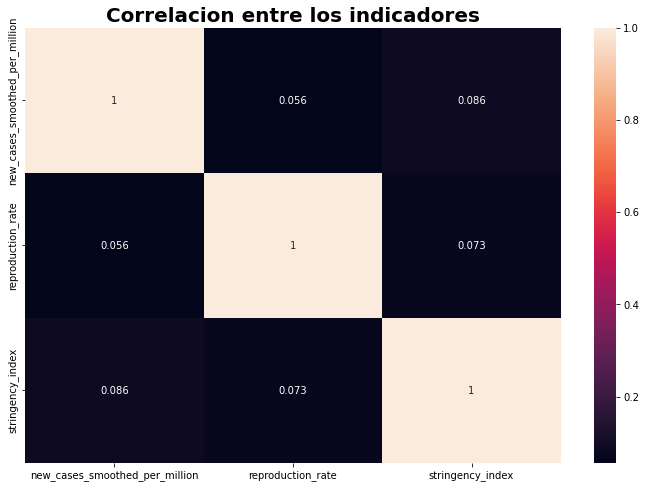

In [30]:
# Analisis de Correlacion entre los indicadores 

corr_df = datos_paises.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_df, annot=True)
plt.title("Correlacion entre los indicadores", fontsize=20, fontweight="bold")

## Ejemplo Argentina

In [31]:
cuaren_arg = data_cuarentena[(data_cuarentena.Entity == "Argentina")&(data_cuarentena.Day < "2022-05-01")&(data_cuarentena.Day >= "2020-03-03")]
cuaren_arg.set_index("Day", inplace=True)
cuaren_arg

,Entity,Code,stay_home_requirements
Day,,,
2020-03-03,Argentina,ARG,0
2020-03-04,Argentina,ARG,0
2020-03-05,Argentina,ARG,0
2020-03-06,Argentina,ARG,0
2020-03-07,Argentina,ARG,0
...,...,...,...
2022-04-26,Argentina,ARG,0
2022-04-27,Argentina,ARG,0
2022-04-28,Argentina,ARG,0


Text(0.5, 0, 'fecha')

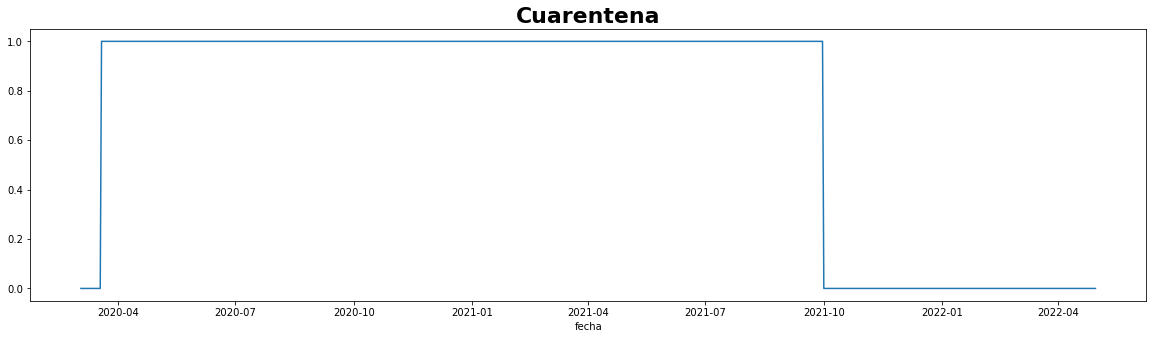

In [32]:
plt.figure(figsize=(20,5))
plt.plot(cuaren_arg.stay_home_requirements)
plt.title("Cuarentena", fontsize= 22, fontweight="bold")
plt.xlabel("fecha")

In [33]:
dt_arg = datos_paises[(datos_paises.location == "Argentina")]
dt_arg.drop(columns="location", inplace=True)
dt_arg.dropna(inplace=True)
dt_arg.set_index("date", inplace=True)
dt_arg["y_cuarentena"] = cuaren_arg.stay_home_requirements
dt_arg

,new_cases_smoothed_per_million,reproduction_rate,stringency_index,y_cuarentena
date,,,,
2020-03-21,0.388,2.38,88.89,1.0
2020-03-22,0.692,2.39,88.89,1.0
2020-03-23,0.767,2.25,100.00,1.0
2020-03-24,0.999,2.12,100.00,1.0
2020-03-25,0.965,2.02,100.00,1.0
...,...,...,...,...
2022-05-15,106.468,-0.04,39.81,NaN
2022-05-16,106.468,-0.04,39.81,NaN
2022-05-17,106.468,-0.04,39.81,NaN


In [34]:
dt_arg.isna().sum()

new_cases_smoothed_per_million     0
reproduction_rate                  0
stringency_index                   0
y_cuarentena                      19
dtype: int64

In [35]:
dt_arg.dropna(inplace=True)
dt_arg.isna().sum()

new_cases_smoothed_per_million    0
reproduction_rate                 0
stringency_index                  0
y_cuarentena                      0
dtype: int64

## Modelo

In [36]:
X = dt_arg.drop(columns=["y_cuarentena"])
y = dt_arg.y_cuarentena

In [37]:
logreg = LogisticRegression()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [39]:
#  penalty — Specify the norm of the penalty.
#  C — Inverse of regularization strength; smaller values specify stronger regularization.
#  solver — Algorithm to use in the optimization problem.
#  max_iter — Maximum number of iterations taken for the solvers to converge.

# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [40]:
model = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)

In [41]:
model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [42]:
print("Tuned Hyperparameters :", model.best_params_)
print("Accuracy :",model.best_score_)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 1.0


In [43]:
logreg = LogisticRegression(**model.best_params_)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.001, solver='newton-cg')

In [44]:
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)

AC SCORE TRAIN: 1.0
AC SCORE TEST: 1.0
F1 SCORE:  1.0


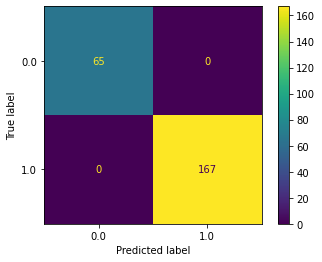

In [45]:
puntajes(X_test, X_train, y_test, y_test_pred, logreg)

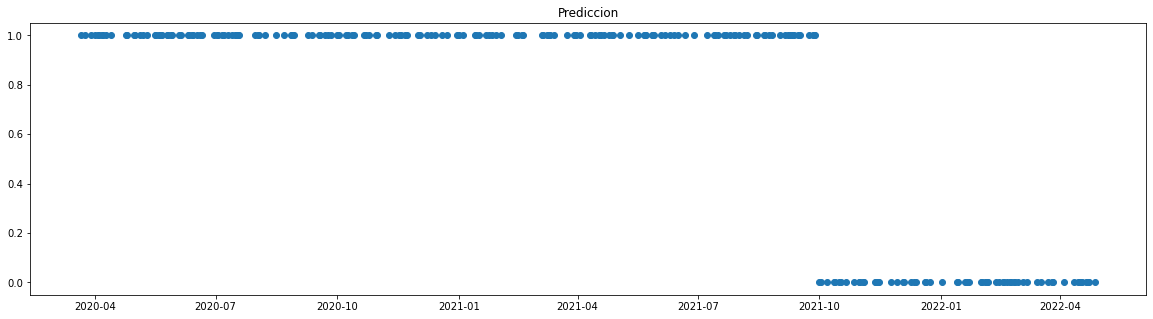

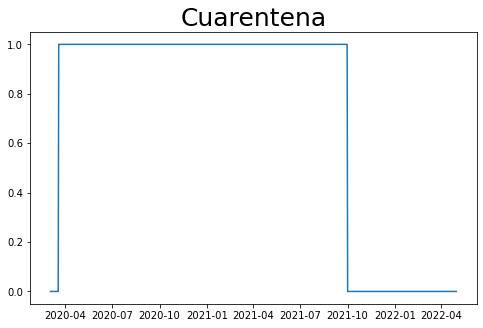

In [46]:
plt.figure(figsize=(20,5))
plt.scatter(X_test.index, y_test_pred)
plt.title("Prediccion")

plt.figure(figsize=(8,5))
plt.title("Cuarentena", fontsize=25)
plt.plot(cuaren_arg.stay_home_requirements)

In [47]:
score_arg = logreg.score(X_test, y_test)
w0 = logreg.intercept_[0]
w = w1, w2, w3 = logreg.coef_[0]
 
equation = "y = %f + (%f * x1) + (%f * x2) + (%f * x3)" % (w0, w1, w2, w3)
print(equation)

model_arg_ec = pd.DataFrame({"Pais":"Argentina","w0":[w0], "w1":[w1], "w2":[w2], "w3":[w3], "Score":[score_arg]})
model_arg_ec

y = -12.052711 + (-0.001795 * x1) + (-0.001980 * x2) + (0.208892 * x3)


,Pais,w0,w1,w2,w3,Score
0,Argentina,-12.052711,-0.001795,-0.00198,0.208892,1.0


                          feature  importance
2                stringency_index    1.232311
0  new_cases_smoothed_per_million    0.998206
1               reproduction_rate    0.998022


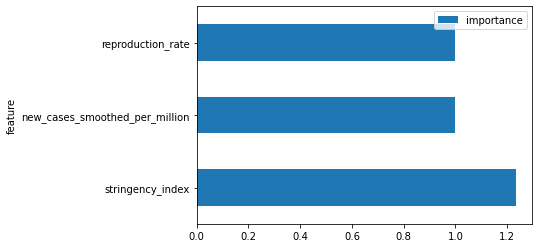

In [48]:
import math
feature_names = ["new_cases_smoothed_per_million","reproduction_rate","stringency_index"]
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
print(feature_importance)
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

## 10 PAISES

Preprocesamiento

In [49]:
cuaren_paises = data_cuarentena[data_cuarentena.Entity.isin(sel2_paises)]
cuaren_paises.set_index("Day", inplace=True)

In [50]:
list = []

for i in sel2_paises:

    dt = datos_paises[(datos_paises.location == i)]
    dt.drop(columns="location", inplace=True)
    dt.fillna(0,inplace=True)
    dt.set_index("date", inplace=True)
    dt["y_cuarentena"] = cuaren_paises[cuaren_paises.Entity == i].stay_home_requirements
    list.append(dt)

dt_modelo = pd.concat(list)

In [51]:
dt_modelo.reset_index(drop=True)

,new_cases_smoothed_per_million,reproduction_rate,stringency_index,y_cuarentena
0,0.000,0.0,0.0,0.0
1,0.000,0.0,0.0,0.0
2,0.000,0.0,0.0,0.0
3,0.000,0.0,0.0,0.0
4,0.000,0.0,0.0,0.0
...,...,...,...,...
8438,99.663,0.0,0.0,NaN
8439,119.237,0.0,0.0,NaN
8440,105.966,0.0,0.0,NaN
8441,122.147,0.0,0.0,NaN


In [52]:
dt_modelo.isna().sum()

new_cases_smoothed_per_million      0
reproduction_rate                   0
stringency_index                    0
y_cuarentena                      158
dtype: int64

In [53]:
dt_modelo.dropna(inplace=True)

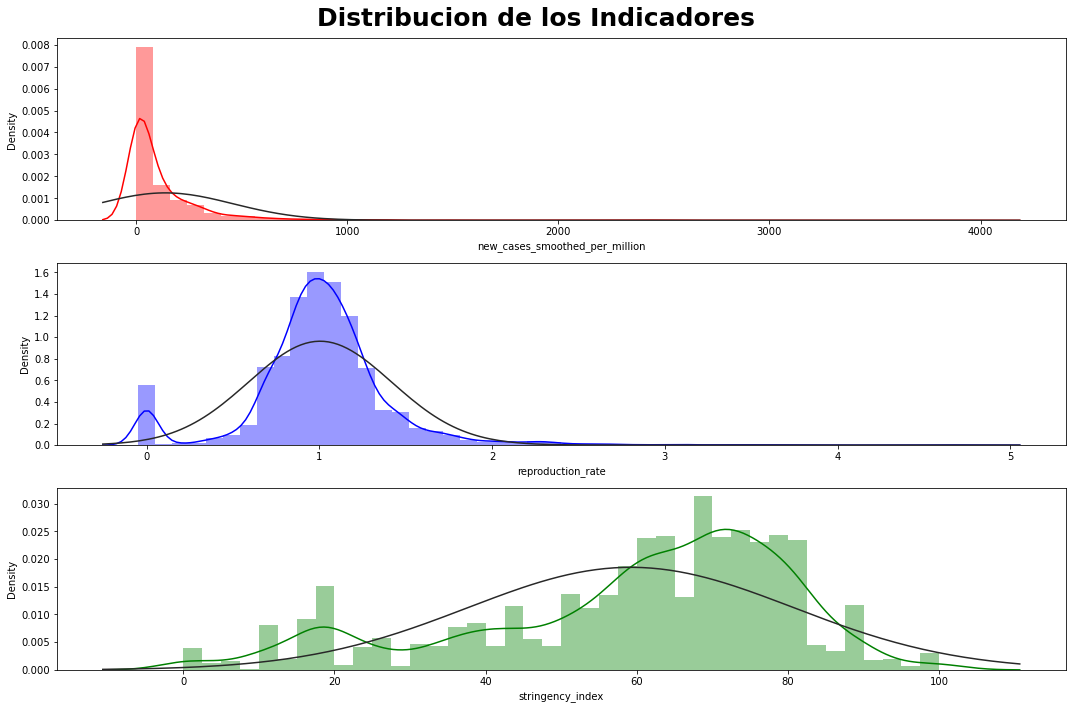

In [54]:
from scipy.stats import norm
#distribuciones
fig, axes = plt.subplots(3, figsize=(15,10))

fig.suptitle('Distribucion de los Indicadores', fontsize="25", fontweight="bold")

sns.distplot(ax=axes[0], a=dt_modelo.new_cases_smoothed_per_million,fit=norm, kde=True,color= "r")
sns.distplot(ax=axes[1], a=dt_modelo.reproduction_rate,fit=norm, kde=True, color= "b")
sns.distplot(ax=axes[2], a=dt_modelo.stringency_index,fit=norm, kde=True,  color= "g")

plt.tight_layout()

In [55]:
X = dt_modelo.drop(columns=["y_cuarentena"])
y = dt_modelo.y_cuarentena

## Modelos

### Regresion Logistica

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [57]:
logreg = LogisticRegression()
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [58]:
model = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [59]:
model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [60]:
print("Tuned Hyperparameters :", model.best_params_)
print("Accuracy :",model.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.8403165386218807


In [61]:
logreg = LogisticRegression(**model.best_params_)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [62]:
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)

AC SCORE TRAIN: 0.8404897396102776
AC SCORE TEST: 0.8390989541432019
F1 SCORE:  0.8388922038153381


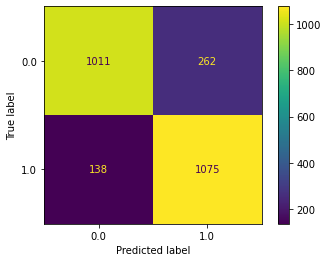

In [63]:
puntajes(X_test,X_train,y_test, y_test_pred, logreg)

In [64]:
score_paises = logreg.score(X_test, y_test)
w0 = logreg.intercept_[0]
w = w1, w2, w3 = logreg.coef_[0]
 
equation = "y = %f + (%f * x1) + (%f * x2) + (%f * x3)" % (w0, w1, w2, w3)
print(equation)

model_paises_ec = pd.DataFrame({"Seleccion":"Paises","w0":[w0], "w1":[w1], "w2":[w2], "w3":[w3], "Score":[score_paises]})
model_paises_ec

y = -5.959998 + (-0.000539 * x1) + (-0.585440 * x2) + (0.106604 * x3)


,Seleccion,w0,w1,w2,w3,Score
0,Paises,-5.959998,-0.000539,-0.58544,0.106604,0.839099


Importancias de los indicadores

                          feature  importance
2                stringency_index    1.112494
0  new_cases_smoothed_per_million    0.999461
1               reproduction_rate    0.556861


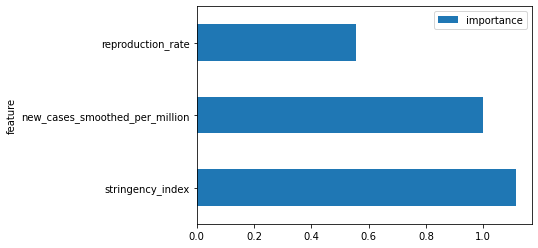

In [65]:
feature_names = ["new_cases_smoothed_per_million","reproduction_rate","stringency_index"]
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
print(feature_importance)
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

### Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [67]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
model = GridSearchCV(gnb,                    # model
                   param_grid = params_NB,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
model.fit(X_train,y_train)
print(model.best_params_)
print(model.best_score_)

{'var_smoothing': 8.111308307896873e-08}
0.8197984039068549


AC SCORE TRAIN: 0.8197965166408001
AC SCORE TEST: 0.8234111021721641
F1 SCORE:  0.8220838176631021


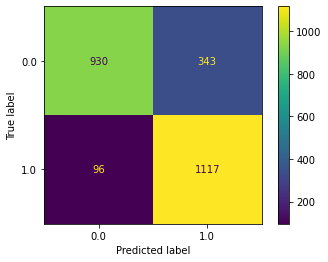

In [68]:
gnb = GaussianNB(**model.best_params_)
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)
y_train_pred = gnb.predict(X_train)
puntajes(X_test,X_train,y_test, y_test_pred, gnb)

## Prueba en paises nuevos

### Preprocesamiento

In [69]:
sel3paises = ["India","Spain","Chile","Germany","United States","Russia","France","Thailand","Kazakhstan","Australia"]

In [70]:
cuaren_paises = data_cuarentena[data_cuarentena.Entity.isin(sel3paises)]
cuaren_paises.set_index("Day", inplace=True)

In [71]:
datos_paises = datos[(datos.location.isin(sel3paises)) & (datos.date < "2022-05-01")]
datos_paises = datos[datos.location.isin(sel3paises)]
datos_paises = datos_paises[["location","date","new_cases_smoothed_per_million","reproduction_rate","stringency_index"]]
datos_paises.date = pd.to_datetime(datos_paises.date)
datos_paises

,location,date,new_cases_smoothed_per_million,reproduction_rate,stringency_index
9928,Australia,2020-01-26,NaN,NaN,5.56
9929,Australia,2020-01-27,NaN,NaN,5.56
9930,Australia,2020-01-28,NaN,NaN,5.56
9931,Australia,2020-01-29,NaN,NaN,5.56
9932,Australia,2020-01-30,NaN,NaN,5.56
...,...,...,...,...,...
180039,United States,2022-05-25,325.423,NaN,38.89
180040,United States,2022-05-26,319.657,NaN,38.89
180041,United States,2022-05-27,313.602,NaN,NaN
180042,United States,2022-05-28,307.429,NaN,NaN


In [72]:
list = []

for i in sel3paises:

    dt = datos_paises[(datos_paises.location == i)]
    dt.drop(columns="location", inplace=True)
    dt.fillna(0,inplace=True)
    dt.set_index("date", inplace=True)
    dt["y_cuarentena"] = cuaren_paises[cuaren_paises.Entity == i].stay_home_requirements
    list.append(dt)

dt_modelo_2 = pd.concat(list)

In [73]:
dt_modelo_2.isna().sum()

new_cases_smoothed_per_million     0
reproduction_rate                  0
stringency_index                   0
y_cuarentena                      78
dtype: int64

In [74]:
dt_modelo_2.dropna(inplace=True)

## Modelos

In [75]:
X_final = dt_modelo_2.drop(columns="y_cuarentena")
y_final = dt_modelo_2.y_cuarentena

### Regresion Logistica

In [76]:
y_final_predict = logreg.predict(X_final)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_final, y_final_predict)

0.7954572481864669

### Naive Bayes

In [78]:
y_final_predict = gnb.predict(X_final)
from sklearn.metrics import accuracy_score
accuracy_score(y_final, y_final_predict)

0.7545486978237602

## Conclusion

Podemos decir que el modelo de regresion logistica que hemos entrenado con 5 paises que hicieron cuarentena y 5 que no, debido a una precision aceptable, puede servir para predecir cuando otro pais esta haciendo o no cuarentena en base a los indicadores propuestos.

# Investigación

¿Como funciona el modelo si lo probamos con todos los paises del dataset?

## Preprocesamiento

In [79]:
cuaren_todo = data_cuarentena.copy()
cuaren_todo.set_index("Day", inplace=True)

In [80]:
todo_dt = datos[["location","date","new_cases_smoothed_per_million","reproduction_rate","stringency_index"]]
todo_dt.date = pd.to_datetime(todo_dt.date)
todo_dt

,location,date,new_cases_smoothed_per_million,reproduction_rate,stringency_index
0,Afghanistan,2020-02-24,NaN,NaN,8.33
1,Afghanistan,2020-02-25,NaN,NaN,8.33
2,Afghanistan,2020-02-26,NaN,NaN,8.33
3,Afghanistan,2020-02-27,NaN,NaN,8.33
4,Afghanistan,2020-02-28,NaN,NaN,8.33
...,...,...,...,...,...
190179,Zimbabwe,2022-05-25,11.558,NaN,NaN
190180,Zimbabwe,2022-05-26,13.631,NaN,NaN
190181,Zimbabwe,2022-05-27,14.104,NaN,NaN
190182,Zimbabwe,2022-05-28,14.104,NaN,NaN


In [81]:
sel4paises = todo_dt.location.unique().tolist()

In [82]:
list = []

for i in sel4paises:

    dt = todo_dt[(todo_dt.location == i)]
    dt.drop(columns="location", inplace=True)
    dt.fillna(0,inplace=True)
    dt.set_index("date", inplace=True)
    dt["y_cuarentena"] = cuaren_todo[cuaren_todo.Entity == i].stay_home_requirements
    list.append(dt)

dt_modelo_3 = pd.concat(list)

In [83]:
dt_modelo_3

,new_cases_smoothed_per_million,reproduction_rate,stringency_index,y_cuarentena
date,,,,
2020-02-24,0.000,0.0,8.33,0.0
2020-02-25,0.000,0.0,8.33,0.0
2020-02-26,0.000,0.0,8.33,0.0
2020-02-27,0.000,0.0,8.33,0.0
2020-02-28,0.000,0.0,8.33,0.0
...,...,...,...,...
2022-05-25,11.558,0.0,0.00,NaN
2022-05-26,13.631,0.0,0.00,NaN
2022-05-27,14.104,0.0,0.00,NaN


In [84]:
dt_modelo_3.dropna(inplace=True)

In [85]:
X = dt_modelo_3.drop(columns=["y_cuarentena"])
y = dt_modelo_3.y_cuarentena

## Regresion Logistica

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

logreg = LogisticRegression()
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [87]:
model = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [ ]:
model.fit(X_train, y_train)

In [ ]:
print("Tuned Hyperparameters :", model.best_params_)
print("Accuracy :",model.best_score_)

In [ ]:
logreg = LogisticRegression(**model.best_params_)
logreg.fit(X_train, y_train)

In [ ]:
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)

In [ ]:
puntajes(X_test,X_train,y_test, y_test_pred, logreg)

In [ ]:
logreg.score(X_test, y_test)

Conclusion

Vemos que la precision del modelo es un poco inferior pero semejante que la del modelo que uso solo 10 paises, por lo que podemos asumir que utilizar el dataset completo aporta un poco al entrenamiento del modelo haciendolo mas generalizado, pero no es realmente necesario. La seleccion que hicimos previamente fue lo suficientemente representativa.

¿Existe una relacion entre el promedio de dias que se hizo y no se hizo cuarentena, y el porcentaje de la poblacion contagiada acumulada?

In [ ]:
excepciones = ["Africa","Asia","Europe","European Union","High income","Lower middle income","South America","Upper middle income","World"]

In [ ]:
prom = data_cuarentena.groupby("Entity").mean().sort_values(by=["stay_home_requirements"])
prom

In [ ]:
por_poblacion = datos[["location","total_cases","population"]].groupby("location").max()

In [ ]:
por_poblacion[por_poblacion.total_cases > 10000000]

In [ ]:
por_poblacion.drop(labels=excepciones, inplace=True)

In [ ]:
por_poblacion

In [ ]:
por_poblacion["prom_cuarentena"] = prom.stay_home_requirements
por_poblacion["por_pob_contagiada"] = (por_poblacion.total_cases / por_poblacion.population) * 100

In [ ]:
por_poblacion.dropna(inplace=True)
por_poblacion.isna().sum()

In [ ]:
por_poblacion

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [ ]:
por_pob_reg = por_poblacion.por_pob_contagiada.values.reshape(-1,1)
prom_cuare_reg = por_poblacion.prom_cuarentena.values.reshape(-1,1)

linear_reg.fit(prom_cuare_reg,por_pob_reg)
y_pred = linear_reg.predict(prom_cuare_reg)

In [ ]:
m = linear_reg.coef_[0][0]
c = linear_reg.intercept_[0]
print(m)
print(c)

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(por_poblacion.prom_cuarentena, por_poblacion.por_pob_contagiada)
plt.plot(prom_cuare_reg, y_pred, color="red")
plt.ylabel("% de Poblacion Contagiada", fontsize=25)
plt.xlabel("Promedio Cuarentena",fontsize=25)
plt.title("Relacion entre % de contagiados y promedio de dias hechos cuarentena", fontsize=40)

## Conclusion

Vemos hay una leve tendencia que indica que al aumentar la cantidad de tiempo haciendo cuarentena, disminuye el porcentaje de poblacion contagiada.

¿Como es la relacion entre el parametro de crecimiento "k" y el promedio del tiempo hecho cuarentena?

In [ ]:
df_f.set_index("Pais", inplace=True)
df_f["prom"] = prom.stay_home_requirements
df_f.drop(columns=["t0","t"])

In [ ]:
linear_reg = LinearRegression()

In [ ]:
X_k = df_f.k.values.reshape(-1,1)
y_k = df_f.prom.values.reshape(-1,1)

linear_reg.fit(X_k,y_k)
y_pred = linear_reg.predict(y_k)

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(df_f.k, df_f.prom)
plt.plot(y_k, y_pred, color="red")
plt.xlabel("Valor de k", fontsize=20)
plt.ylabel("Promedio Cuarentena", fontsize=20)
plt.ylim(bottom=0)
plt.xlim(right=0.4)

## Conclusion

Lo esperable es que al aumentar la cantidad de tiempo hecho cuarentena el valor de k sea menor, por lo que la tendencia acompaña la idea. Aun asi para poder saber si existe alguna tendencia real deberiamos calcular la ventana de tiempo de crecimiento exponencial de muchos mas paises, obtener su k y ver entonces si existe dicha tendencia.

# Informe

Primera Parte - ¿Como empezo la pandemia?

En esta instancia se propuso analizar 10 paises con sus respectivas ventanas de tiempo donde los contagios de Covid-19 estaban en una fase de crecimiento exponencial. La cantidad de casos confirmados puede aproximarse asi con la siguiente fórmula:


El valor de k esta relacionado con el tiempo en que una persona enferma contagia, el nivel de infecciosidad del virus, y por la circulacion de la gente. Una de las propuestas de este proyecto es ver efectivamente si este parametro k tiene relaciona con el tiempo hecho cuarentena de forma de que al hacer mas cuarentena, este valor disminuya. Esto se analizó en la parte de "investigacion" donde si bien obtuvimos la tendencia que esperamos, no es una conclusion estadisticamente robusta ya que solo utilizamos 10 paises.



El siguiente desafio fue realizar un intervalo de confianza para el promedio de k de los 10 paises seleccionados, y con este tratar de predecir el k mundial. Se propuso el siguiente flujo de trabajo para cada pais:



Al haber sido este intervalo de confianza muy grande y la metrica de error (RMSE) muy alta asumimos que el resultado de esto fue predeciblemente malo por varias razones: vimos que el valor de k esta sujeto a muchas variables dependientes de las condiciones politicas, poblacionales y culturales de los paises, no solo es que son pocos paises para poder hacer un modelo con una buena estimacion, sino que los paises deberian parecerse mucho entre si para que esto pueda suceder, y no es el caso. El k predicho fue de aproximadamente 0.12, cuando el real fue 0.099.

 

Segunda Parte - Evaluando Estrategias
En esta parte del proyecto en primer lugar se busca escoger una medida sanitaria, en este caso fue la cuarentena, y 3 indicadores que esten relacionados con el impacto que tiene esta medida. Los indicadores seleccionados fueron:

new_cases_smoothed_per_million = Nuevos casos de COVID-19 (Media movil de 7 dias) por 1,000,000 habitantes. El contado incluye casos probables cuando son reportados.

reproduction_rate = Estimación en tiempo real del R (factor de reproduccion) efectivo del COVID-19

stringency_index = Indice de Rigurosidad de la Respuesta del Gobierno: es una medida compuesta basada en 9 indicadores que incluyen: cierres de escuelas, cierres de espacios de trabajo, prohibicion del transporte publico, etc. Esta reescalado a un valor entre 0 y 100, siendo 100 el valor de mas estricto.

Acerca de estos indicadores concluimos que no estaban correlacionados entre si, y cual fue la relevancia de cada uno para el modelo en funcion de su importancia. Esto lo vemos en los siguientes graficos:

 

El siguiente paso fue seleccionar 5 paises que no hayan hecho cuarentena y 5 que si para luego construir un clasificador binario a partir de una regresion logistica o Naive Bayes, que pueda predecir cuando un pais esta haciendo o no cuarentena. Previamente a realizar el modelo para los 10 paises a modo de ejemplo se probo el modelo para Argentina siendo estos los resultados:

Modelo Argentina

 

Vemos que el modelo funciona muy bien para predecir la cuarentena en este caso, no es una informacion concluyente pero nos da una idea de que el modelo podria funcionar bien.

Modelo 10 Paises

Los paises que hicieron cuarentena seleccionados fueron: Argentina, Mexico, China, India e Italia

Los paises que NO hicieron cuarentena seleccionados fueron: Suecia, Iran, Ukraine, Niger y Uruguay.

Los resultados para la Regresion Logistica en este caso fueron los siguientes:



Los resultados para Naive Bayes en este caso fueron los siguientes:



No hay un sobreajuste por parte de los modelos, la precision de ambos es relativamente buena, y vemos que la regresion logistica aparentemente es el clasificador que funciona mejor de los dos.

Utilización del modelo para predecir paises nuevos

Los paises utilizados para predecir en que momentos habian hecho cuarentena fueron España, Chile, Alemania, Estados Unidos, India, Francia, Rusia , Tailandia, Kazakhstan y Australia.

La precision del modelo de regresion logistica entrenado fue de ≈ 0.786 y la del modelo de Naive Bayes de ≈ 0,750. Con estos resultados podemos decir que el modelo de regresion logistica entrenado con 5 paises que hicieron cuarentena y 5 que no, puede hacer esta prediccion con una precision aceptable.

Investigacion
¿Como funciona el modelo si lo probamos con todos los paises del dataset?

Con la intencion de llevar el modelo a una escala de mayor representatividad probamos entrenandolo con todos los paises del dataset. El resultado obtenido fue de una precision semejante a la que se obtuvo del modelo anterior de 10 paises, lo que nos da una idea de que ese modelo ya era lo suficientemente representativo.



¿Existe una relacion entre el promedio de dias que se hizo y no se hizo cuarentena, y el porcentaje de la poblacion contagiada acumulada?

A forma de tener un indicio de la efectividad de realizar cuarentena en funcion de disminuir la cantidad de contagios, vemos cual es la relacion entre el % de contagiados (expresado como casos totales / poblacion) y el promedio de la cantidad dias en que ese pais hizo cuarentena. Lo esperable es ver que a mayor cantidad de dias hechos cuarentena (mayor valor de Promedio Cuarentena) el % de Poblacion Contagiada sea menor, y justamente esto es lo que vemos en el gráfico.